# Laboratorio de regresión - 1

## Regresión lineal simple

|                |   |
:----------------|---|
| **Nombre**     | Julieta Madrigal   |
| **Fecha**      |  Lunes 26 de enero 2026 |
| **Expediente** |   744029|

La regresión lineal es una herramienta útil para predecir una respuesta cuantitativa. Sirve como un punto de partida a pesar de que existen soluciones más modernas.

Observa la siguiente gráfica.

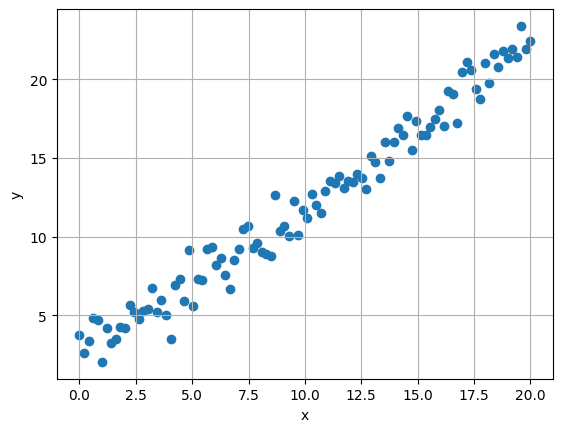

In [1]:
import matplotlib.pyplot as plt; import numpy as np
%matplotlib inline
np.random.seed(0)
x = np.linspace(0, 20, 100); y = 2 + x + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()

**¿Hay alguna relación entre $y$ y $x$?**

Nuestra primera meta debe ser determinar si hay evidencia en los datos de que haya una asociación entre estas variables.

- **¿Por qué?**
- Si hubiera una asociación, **¿qué tan fuerte es?**

## Regresión lineal simple

Un método sencillo para predecir una variable cuantitativa $Y$ dado un solo predictor $X$. Podemos escribir esta relación como:

$$ Y \approx \beta_0 + \beta_1 X$$


A $\beta_0$ y $\beta_1$ se le conoce como los coeficientes o parámetros del modelo. Una vez que usamos los datos históricos para producir estimados $\hat{\beta_0}$ y $\hat{\beta_1}$, podemos predecir el resultado de la variable $y$ basándonos en $x$
$$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $$

donde $\hat{y}$ indica una predicción de $Y$ basado en $X = x$. (El símbolo $\hat{ }$ se usa para hacer notar que es sólo una estimación de un parámetro desconocido)

### Estimando coeficientes

$\beta_0$ y $\beta_1$ son desconocidos. Se deben estimar usando los datos antes de poder predecir.

$ (x_1, y_1), (x_2, y_2), ..., (x_n, y_n) $ representa $n$ observaciones, cada una con datos medidos para $X$ y $Y$.

Nuestros datos contienen 200 muestras en pares ordenados $(x_i, y_i)$. Nuestra meta actual es encontrar $\hat{\beta_0}$ y $\hat{\beta_1}$ tal que exista un modelo lineal que se ajuste bien a los datos ($y_i \approx \hat{\beta_0} + \hat{\beta_1}x_i$  para $ i=1,...,n$).

**¿Qué significa "que se ajuste bien"?**

Observa las 3 propuestas de lineas para ajustar los puntos.

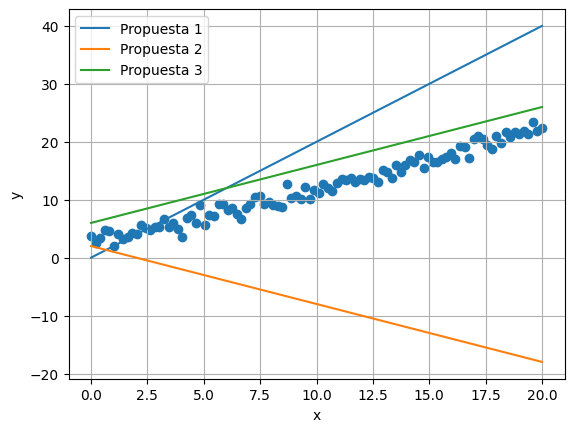

In [ ]:
y_pred1 = 2*x; y_pred2 = -x + 2; y_pred3 = 6 + x
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()
plt.plot(x, y_pred1, label="Propuesta 1"); plt.plot(x, y_pred2, label="Propuesta 2"); plt.plot(x, y_pred3, label="Propuesta 3")
plt.legend(loc="best")

Claramente hay una línea que se ajusta mejor que las otras dos. ¿Cómo sabemos que esa línea es mejor que las otras?

Hay muchas formas de medir el ajuste de una curva; la más común es usar el criterio de los mínimos cuadrados. Si $y_i \approx \hat{\beta_0} + \hat{\beta_1}x_i$ es una predicción de $Y$ basada en el valor número $i$ de $X$, entonces definimos el error/residuo como $e_i = y_i - \hat{y_i}$. Este residuo es la diferencia entre el valor observado y el valor estimado por nuestro modelo lineal. Definimos la suma de los residuos cuadrados (RSS) como:
$$ \text{RSS} = e_1^2 + e_2^2 + ... + e_n^2 $$

Utiliza `sklearn` para estimar los parámetros del modelo.

In [6]:
from sklearn.linear_model import LinearRegression

In [11]:
# obtengo la cantidad de renglores de la matriz
m = len(x)
m

100

In [12]:
# las hago vector
# es m renglones y 1 por beta 0
# son puntos en el eje X
x = x.reshape((m, 1))


In [13]:
lr = LinearRegression(fit_intercept=True)
lr.fit(x, y)

LinearRegression()

In [14]:
lr.intercept_
# el valor de la variable dependiente
# como le puse TRUE este es b0

array([2.20847145])

In [15]:
# este b1
lr.coef_

array([[0.98513366]])

Al resolver el problema analíticamente se encuentra:

$$ \hat{\beta_1} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

$$ \hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x} $$


Compara las estimaciones que encontraste con `sklearn` con las que se encuentran con la fórmula dada arriba ($\bar{x}$ y $\bar{y}$ son las medias muestrales).

In [16]:
x

array([[ 0.        ],
       [ 0.2020202 ],
       [ 0.4040404 ],
       [ 0.60606061],
       [ 0.80808081],
       [ 1.01010101],
       [ 1.21212121],
       [ 1.41414141],
       [ 1.61616162],
       [ 1.81818182],
       [ 2.02020202],
       [ 2.22222222],
       [ 2.42424242],
       [ 2.62626263],
       [ 2.82828283],
       [ 3.03030303],
       [ 3.23232323],
       [ 3.43434343],
       [ 3.63636364],
       [ 3.83838384],
       [ 4.04040404],
       [ 4.24242424],
       [ 4.44444444],
       [ 4.64646465],
       [ 4.84848485],
       [ 5.05050505],
       [ 5.25252525],
       [ 5.45454545],
       [ 5.65656566],
       [ 5.85858586],
       [ 6.06060606],
       [ 6.26262626],
       [ 6.46464646],
       [ 6.66666667],
       [ 6.86868687],
       [ 7.07070707],
       [ 7.27272727],
       [ 7.47474747],
       [ 7.67676768],
       [ 7.87878788],
       [ 8.08080808],
       [ 8.28282828],
       [ 8.48484848],
       [ 8.68686869],
       [ 8.88888889],
       [ 9

In [17]:
y

array([[ 3.76405235],
       [ 2.60217741],
       [ 3.38277839],
       [ 4.84695381],
       [ 4.6756388 ],
       [ 2.03282313],
       [ 4.16220963],
       [ 3.26278421],
       [ 3.51294276],
       [ 4.22878032],
       [ 4.16424559],
       [ 5.67649573],
       [ 5.18528015],
       [ 4.74793764],
       [ 5.27214606],
       [ 5.36397736],
       [ 6.72640231],
       [ 5.22918517],
       [ 5.94943134],
       [ 4.9842881 ],
       [ 3.48741422],
       [ 6.89604284],
       [ 7.30888064],
       [ 5.90429963],
       [ 9.11823947],
       [ 5.59613938],
       [ 7.29828377],
       [ 7.2673616 ],
       [ 9.18934487],
       [ 9.32794463],
       [ 8.21555349],
       [ 8.64078878],
       [ 7.57686072],
       [ 6.6858702 ],
       [ 8.52077472],
       [ 9.22705604],
       [10.50301795],
       [10.67712732],
       [ 9.28944086],
       [ 9.57648513],
       [ 9.03225512],
       [ 8.86281035],
       [ 8.77857829],
       [12.63764408],
       [10.37923671],
       [10

In [18]:
# sacamos la media porque son las muestrales
x_mean = x.mean()
y_mean = y.mean()

In [21]:
# vector - escalar que es la media
parte_x = x - x_mean
parte_x

array([[-10.        ],
       [ -9.7979798 ],
       [ -9.5959596 ],
       [ -9.39393939],
       [ -9.19191919],
       [ -8.98989899],
       [ -8.78787879],
       [ -8.58585859],
       [ -8.38383838],
       [ -8.18181818],
       [ -7.97979798],
       [ -7.77777778],
       [ -7.57575758],
       [ -7.37373737],
       [ -7.17171717],
       [ -6.96969697],
       [ -6.76767677],
       [ -6.56565657],
       [ -6.36363636],
       [ -6.16161616],
       [ -5.95959596],
       [ -5.75757576],
       [ -5.55555556],
       [ -5.35353535],
       [ -5.15151515],
       [ -4.94949495],
       [ -4.74747475],
       [ -4.54545455],
       [ -4.34343434],
       [ -4.14141414],
       [ -3.93939394],
       [ -3.73737374],
       [ -3.53535354],
       [ -3.33333333],
       [ -3.13131313],
       [ -2.92929293],
       [ -2.72727273],
       [ -2.52525253],
       [ -2.32323232],
       [ -2.12121212],
       [ -1.91919192],
       [ -1.71717172],
       [ -1.51515152],
       [ -1

In [23]:
y_mean

np.float64(12.059808015534486)

In [22]:
# vector - escalar que es la media
parte_y = y - y_mean
parte_y

array([[ -8.29575567],
       [ -9.45763061],
       [ -8.67702963],
       [ -7.21285421],
       [ -7.38416922],
       [-10.02698489],
       [ -7.89759839],
       [ -8.79702381],
       [ -8.54686525],
       [ -7.8310277 ],
       [ -7.89556242],
       [ -6.38331229],
       [ -6.87452787],
       [ -7.31187037],
       [ -6.78766195],
       [ -6.69583066],
       [ -5.33340571],
       [ -6.83062284],
       [ -6.11037668],
       [ -7.07551992],
       [ -8.57239379],
       [ -5.16376518],
       [ -4.75092737],
       [ -6.15550839],
       [ -2.94156854],
       [ -6.46366864],
       [ -4.76152425],
       [ -4.79244641],
       [ -2.87046314],
       [ -2.73186339],
       [ -3.84425453],
       [ -3.41901923],
       [ -4.4829473 ],
       [ -5.37393782],
       [ -3.5390333 ],
       [ -2.83275198],
       [ -1.55679006],
       [ -1.38268069],
       [ -2.77036716],
       [ -2.48332289],
       [ -3.0275529 ],
       [ -3.19699767],
       [ -3.28122972],
       [  0

In [26]:
# multiplicamos (xi−x¯)(yi−y¯) y hacemos la suma
parte_x_y = sum(parte_x * parte_y)
parte_x_y

array([3350.11782268])

In [27]:
# obtenemos los cuadrados (xi−x¯)2 y hacemos la suma
parte_x_2 = sum(parte_x**2)
parte_x_2

array([3400.67340067])

In [28]:
# obtenemos la beta 1
b1 = parte_x_y / parte_x_2
b1

array([0.98513366])

In [29]:
# obtenemos beta 0
b0 = y_mean - (b1 * x_mean)
b0

array([2.20847145])

Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión.

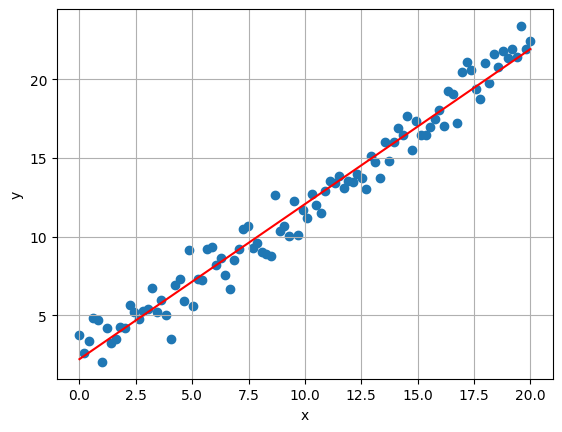

In [37]:
plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x, y, label="Observaciones")
# es para que esta cuadriculado
plt.grid()

# aqui graficamos la linea de ajuste con regresion
# b0 + b1*x es la parte de y = mx +b
plt.plot(x, b0 + b1 * x, color='red', label="Línea de Regresión")
plt.show()

### Verificando la precisión del modelo

¿Cómo medimos qué tan bueno es nuestro modelo para predecir?
- RSE (Residual Standard Error)
- $R^2$

#### $R^2$

El RSE se mide con unidades de $Y$, así que no siempre se puede saber cuál es un buen valor. Imagina que tienes un $Y$ con valores entre $-1$ y $1$, y que tienes otro $Y$ con valores entre $1'000,000$ y $100'000,000$. Los errores cuadrados van a ser mucho mayores en el segundo caso que en el primero, pero esto no significa que el modelo creado en el segundo caso sea malo.

El estadístico $R^2$ es una medida de ajuste. Su valor es la proporción de la varianza sí explicada, así que siempre toma valores entre $0$ y $1$. Su fórmula es:

$$ R^2 = \frac{\text{TSS} - \text{RSS}}{\text{TSS}} = 1 - \frac{\text{RSS}}{\text{TSS}}$$
$$ \text{TSS} = \sum_{i=1}^n (y_i - \bar{y})^2$$

TSS mide la varianza total de $Y$. RSS mide la varianza que queda sin explicarse después de la regresión. Entonces TSS-RSS mide la varianza que sí está explicada.

$R^2$ mide la proporción de la varianza en $Y$ que puede ser explicada usando $X$.

El estadístico $R^2$ se puede encontrar accediendo a la función `score` del objeto `LinearRegression` de `sklearn`.

- **¿Cuánta varianza queda sin explicar?**

In [41]:
# R2 es la varianza que SE EXPLICA
R2 = lr.score(x, y)
R2

0.9703537814132045

In [43]:
# para obtener la varianza que NO SE EXPLICA en porcentaje
(1-R2)*100

2.9646218586795503

A partir de los resultados obtendios podemos concluir que la varianza que queda sin explicar es el 2.96 ~ 3%.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3